In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('heart.csv')

df = df.iloc[:, :-1]

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [15]:
ss = StandardScaler()
df_scaled = ss.fit_transform(df)

df_scaled = pd.DataFrame(columns=df.columns, data=df_scaled)
df_scaled.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03
mean,-3.431402e-16,1.802352e-16,5.545699e-17,-7.036106e-16,-3.466062e-18,-4.159275e-17,-8.318549e-17,-4.332578e-16,-7.625337e-17,-2.426243e-16,1.854343e-16,1.819683e-17,2.530225e-16
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-1.511706e+00,-9.157554e-01,-2.148237e+00,-2.327054e+00,-4.188779e-01,-1.004049e+00,-3.397080e+00,-7.122871e-01,-9.123291e-01,-2.243675e+00,-7.319715e-01,-3.746070e+00
25%,-7.095548e-01,-1.511706e+00,-9.157554e-01,-6.632165e-01,-6.787242e-01,-4.188779e-01,-1.004049e+00,-7.442713e-01,-7.122871e-01,-9.123291e-01,-6.241209e-01,-7.319715e-01,-5.221223e-01
50%,1.726817e-01,6.615041e-01,5.593123e-02,-9.205458e-02,-1.163527e-01,-4.188779e-01,8.912549e-01,1.255019e-01,-7.122871e-01,-2.311765e-01,-6.241209e-01,-7.319715e-01,-5.221223e-01
75%,7.240794e-01,6.615041e-01,1.027618e+00,4.791073e-01,5.623715e-01,-4.188779e-01,8.912549e-01,7.343432e-01,1.403928e+00,6.202642e-01,9.954333e-01,2.386246e-01,1.089852e+00
max,2.488552e+00,6.615041e-01,1.999305e+00,3.906079e+00,6.166694e+00,2.387330e+00,2.786558e+00,2.299935e+00,1.403928e+00,4.366603e+00,9.954333e-01,3.150413e+00,1.089852e+00


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(df_scaled)

kmeans.inertia_

9401.457564258928

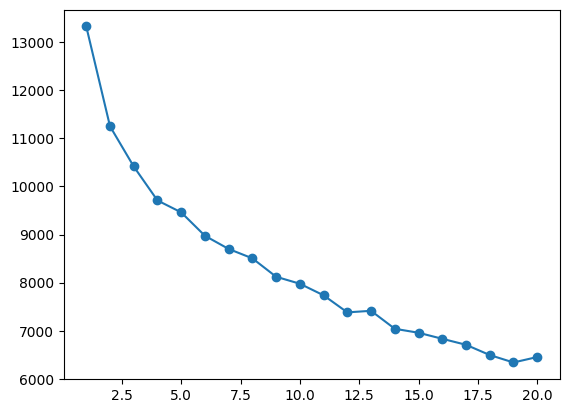

In [ ]:
SSE = []
for k in range(1, 21):
    SSE.append(KMeans(n_clusters=k, init='k-means++').fit(df_scaled).inertia_)

plt.plot(np.arange(1, 21), SSE, marker='o')
plt.show()

# using k between 5 and 8

In [35]:
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(df_scaled)

predictions = kmeans.predict(df_scaled)
f = pd.DataFrame()
f['clusters'] = predictions
f['clusters'].value_counts()

clusters
1    269
3    227
5    214
2    142
0     91
4     82
Name: count, dtype: int64

In [36]:
# PCA

df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122


In [71]:
pca = PCA(n_components=12)
p_components = pca.fit_transform(df_scaled)

# plt.scatter(p_components[:, 0], p_components[:, 1])
# plt.tight_layout()
# plt.show()

# print(pca.components_)
display(pca.explained_variance_)
display(pca.explained_variance_ratio_.sum())

pcs = pd.DataFrame(
    data=pca.components_,
    columns=[(lambda feature: f'mean {feature}')(feature) for feature in df.columns],
    index=[f'PCA{i}' for i in range(1, 13)]
)

pcs

array([2.7808016 , 1.55787454, 1.20216278, 1.17036695, 1.00014601,
       0.97329354, 0.87728796, 0.76873509, 0.7266474 , 0.63107452,
       0.52276598, 0.43207609])

0.9716075076402053

,mean age,mean sex,mean cp,mean trestbps,mean chol,mean fbs,mean restecg,mean thalach,mean exang,mean oldpeak,mean slope,mean ca,mean thal
PCA1,0.309574,0.078073,-0.285616,0.178760,0.127985,0.080713,-0.129490,-0.416970,0.363869,0.421781,-0.380108,0.265334,0.214070
PCA2,0.398286,-0.379076,0.274947,0.438909,0.369819,0.321476,-0.244760,0.093830,-0.258613,-0.070527,0.064792,0.105858,-0.182619
PCA3,-0.070616,0.618113,0.198286,0.154674,-0.251021,0.447107,-0.238472,0.197128,-0.050942,-0.044178,0.137898,0.319281,0.256048
PCA4,0.053975,0.006604,-0.403411,-0.128736,0.468203,-0.176946,-0.179450,0.096199,0.129796,-0.322653,0.481771,0.219551,0.352833
PCA5,0.290981,-0.049592,-0.188481,-0.241707,-0.305881,0.233021,0.274561,-0.333954,-0.017338,-0.260365,0.235783,0.432391,-0.416541
PCA6,0.204218,-0.015825,0.228271,0.139863,0.005674,-0.280946,0.632247,0.056088,-0.310502,0.165167,0.062540,0.303059,0.430212
PCA7,-0.249728,-0.184611,-0.216087,0.310433,0.061741,0.517997,0.511241,0.165287,0.385981,-0.054706,0.085794,-0.174228,0.099910
PCA8,0.235570,0.104707,-0.122017,0.622511,-0.411463,-0.361286,-0.076549,-0.139152,0.135023,-0.213249,0.255842,-0.277229,-0.008056
PCA9,-0.383547,-0.198855,-0.327642,0.289129,-0.154697,-0.224158,-0.115155,0.356564,-0.088739,0.247533,-0.035009,0.509161,-0.279659
PCA10,-0.004413,0.546399,0.141045,0.144485,0.482187,-0.188297,0.251059,0.030142,0.193727,0.088694,0.080008,0.025494,-0.525653


<Axes: >

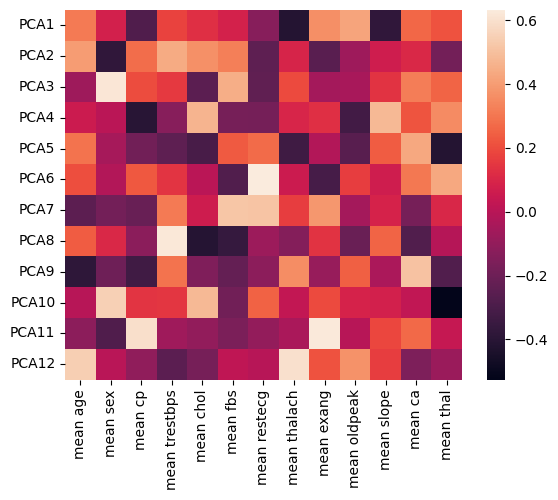

In [75]:
sns.heatmap(pcs)

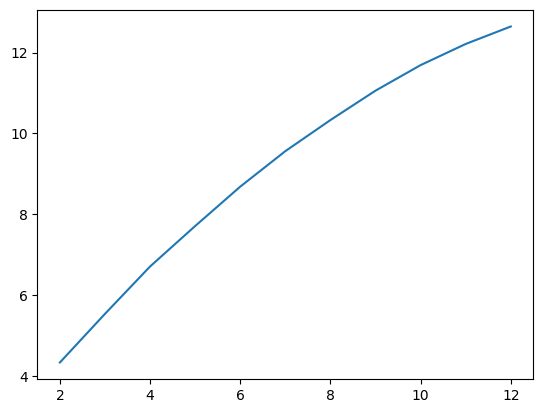

In [ ]:
explained_variances = []
for i in range(2, 13):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    explained_variances.append(np.sum(pca.explained_variance_))

plt.plot(np.arange(2, 13), explained_variances)
plt.xlabel()